## Regressão Linear

Até agora foram vistos alguns conceitos de classificação. Outro importante aspecto do aprendizado supervisionado são os modelos de aprendizagem para problemas de regressão. Nestes problemas, a saída esperada é contínua, em vez de valores discretos como na classificação.

Um conjunto de dados de propaganda é disponibilizado junto com esse notebook, onde cada linha indica um tipo de mercado diferente. Importe os dados para visualizar a estrutura deles:

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('ad.data', index_col=0)
display(data.head())

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.shape

(200, 4)

Quais são os atributos?
- **TV:** dólares gastos em propagandas veiculadas na TV para um produto em determinado mercado (em milhões)
- **Radio:** dólares gastos em propagandas veiculadas em rádio
- **Newspaper:** dólares gastos com propaganda em jornais

Qual o rótulo da amostra?
- **Sales:** vendas (em milhares) de um determinado item em um mercado específico

Para facilitar, os dados também poderiam ser visualizados para compreender melhor com a distribuição, e se há alguma tendência.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


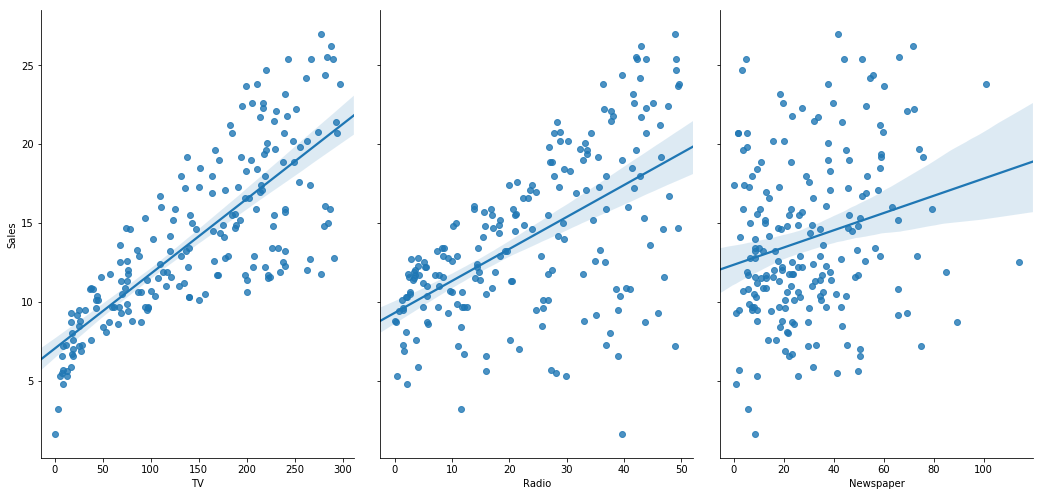

In [3]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Regressão Linear

Uma das formas de resolver um problema desse tipo é aplicando a regressão linear. Nesse método, procura-se uma função capaz de traçar uma linha de tendência que servirá para prever um valor futuro em determinadas condições. A vantagem é que é um modelo matematicamente simples de interpretar. A desvantagem é que dificilmente levará a uma acurácia satisfatória.

### Forma da regressão linear:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ é a saída
- $\beta_0$ é um valor de bias (deslocamento)
- $\beta_1$ é o coeficiente de $x_1$ (do primeiro atributo)
- $\beta_n$ é o coeficiente de $x_n$ (do n-ésimo atributo)

Assim, para esse problema, tem-se:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Os valores $\beta$ são chamados de **coeficientes de modelo** e são ajustados na etapa de aprendizagem, a qual acontece com o ajuste do modelo utilizando o critério dos "quadrados mínimos". Uma vez aprendidos esses parâmetros, o modelo pode ser usado de forma preditiva!

### Separando os atributos da classe

In [4]:
atributos = ['TV', 'Radio', 'Newspaper']

X = data[atributos]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [5]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

Em seguida, é necessário dividir quais dados serão apresentados na etapa de treino e quais dados serão apresentados na etapa de teste:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 3)
(140,)
(60, 3)
(60,)


### Regressão linear no scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
print(modelo.intercept_)
print(modelo.coef_)

2.937215734690609
[0.04695205 0.17658644 0.00185115]


In [9]:
list(zip(atributos, modelo.coef_)) # o comando zip junta dois vetores e forma tuplas

[('TV', 0.04695204776848464),
 ('Radio', 0.17658643526817372),
 ('Newspaper', 0.001851153318892226)]

$$y = 2.93 + 0.0469 \times TV + 0.176 \times Radio + 0.002 \times Newspaper$$

Como interpretar **o coeficiente da variável TV** (0.0469)?

Para uma dada quantia gasta com de Radio e Newspaper, **um adicional de $1.000 gastos com TV** reflete diretamente na **venda de 46.6 itens**, segundo esse modelo.

### Predição

In [10]:
modelo.predict([[100,20,15]])

array([11.19191652])

No cenário dado, era esperado a venda de aproximadamente **11,2 milhões** de itens de produto.

### Avaliação de modelos de regressão

Métricas como acurácia são comuns em problemas de classificação, mas não se aplicam em problemas de regressão. No lugar desta, são utilizadas métricas específicas para valores contínuos.

In [11]:
true = np.array([100, 50, 30, 20])
pred = np.array([90, 50, 50, 30])

**Mean Absolute Error** (MAE) é a média absoluta dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [12]:
# calculando MAE com scikit
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0


**Mean Squared Error** (MSE) é a média do quadrado dos erros:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [13]:
# calculando MSE com scikit
print(metrics.mean_squared_error(true, pred))

150.0


**Root Mean Squared Error** (RMSE) é a raiz quadrada da média do quadrado dos erros:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [14]:
# calculando RMSE com scikit
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


**Mean absolute percentage error** (MAPE) é a média do erro absoluto em percentual:

$$\displaystyle {\mbox{M}}={\frac {100\%}{n}}\sum _{t=1}^{n}\left|{\frac{y_i-\hat{y}_i}{y_i}}\right|$$

In [15]:
# calculando MAPE com numpy -- pq não tem no scikit :(
print(np.mean(np.abs((true - pred) / true)) * 100)

31.666666666666664


A comparação entre as diferentes métricas:

- **MAE** é a mais fácil de entender, porque é uma média.
- **MSE** é mais popular que a MAE porque pune erros maiores.
- **RMSE** é ainda mais popular porque, além das características anteriores, é interpretável em termos da variável de saída.
- **MAPE** é interpretável em termos percentual, porém é necessário tomar cuidado com a divisão por zero

### Calculando RMSE para as predições de Vendas

In [16]:
y_pred = modelo.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3888574107756968


### Validação Cruzada

In [17]:
from sklearn.model_selection import KFold

X = data[atributos].values
y = data.Sales.values

kf = KFold(n_splits = 10, random_state = 42)

scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    scores.append(score)
    
scores = np.array(scores)

print("MAPE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

MAPE: 14.57 (+/- 21.26)
[14.2379049  11.38655631  9.39564339 14.89288845  7.38975824  9.05954821
 45.76783723 12.20962715  9.70433346 11.67973263]


## Exercício

Utilizando a base de dados de Boston sobre preços de casa, desenvolva um modelo capaz de prever o preço das casas com o menor erro possível Para esse experimento, considere outros regressores e faça o pré-processamento dos atributos que achar necessário. Explique minimamente os passos dos códigos dos experimentos para que fique compreensível o que foi feito. 

*Avaliação: A pontuação dessa atividade será normalizada pelo menor resultado da sala obtido ao professor executar os notebooks com a célula de teste (a última). Quanto mais próximo seu resultado estiver do menor resultado da sala, maior será a nota obtida na tarefa. O piso da nota será de 5,0 para os experimentos corretamente elaborados e inferior a 5,0 mediante os problemas encontrados no experimento.*

**Informações sobre a base:** https://scikit-learn.org/stable/datasets/index.html#boston-dataset

**Outros métodos de regressão:** https://scikit-learn.org/stable/supervised_learning.html

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

BostonData = load_boston()

In [2]:
dfBoston = pd.DataFrame(BostonData.data,columns = BostonData.feature_names)

## utilize os recursos aprendidos no módulo 1 para analisar
## se seu modelo tem qualidade e programe o que for necessário a partir desse ponto

# Quando usamos o data frame conseguimos extrair mais informações dos dados

In [3]:
display(dfBoston.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Percebe-se que a coluna do target (MEDV) não esta inclusa no data frame de forma correta, então será criada uma coluna para ela

In [4]:
dfBoston['MEDV'] = BostonData.target
display(dfBoston.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Dessa forma conseguiremos analisar os dados de forma correta

In [5]:
dfBoston.isna().sum()/dfBoston.shape[0]

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

# Verificamos se não havia informações vazias para evitar problemas futuros

In [6]:
import seaborn as sns
correlacao_matriz = dfBoston.corr().round(2)
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data=correlacao_matriz, annot=True)

# Percebe-se que as colunas RM e LSTAT tem uma baixa correlação com várias outras colunas, e uma correlação alta com a target, iremos destaca-las e verificar outras com o mesmo potencial

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


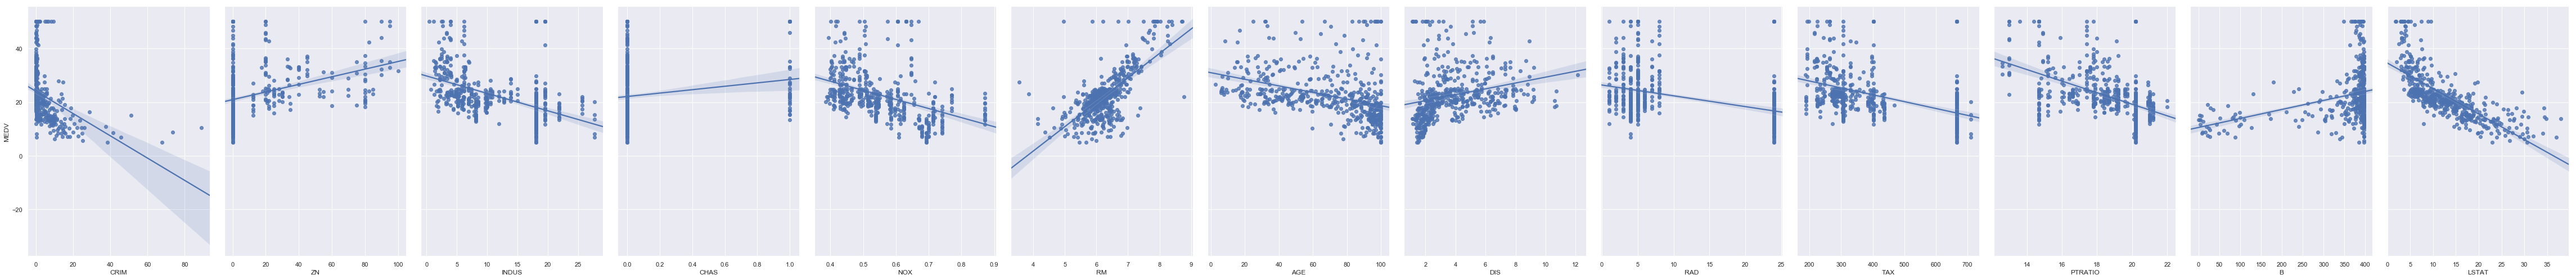

In [7]:
sns.pairplot(dfBoston, x_vars=BostonData.feature_names, y_vars='MEDV', size=7, aspect=0.7, kind='reg')

# numa visão geral, várias colunas possuem valores sobrepostos, o que torna dificil de interpretar, iremos exibir as colunas que mais chamaram a atenção

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


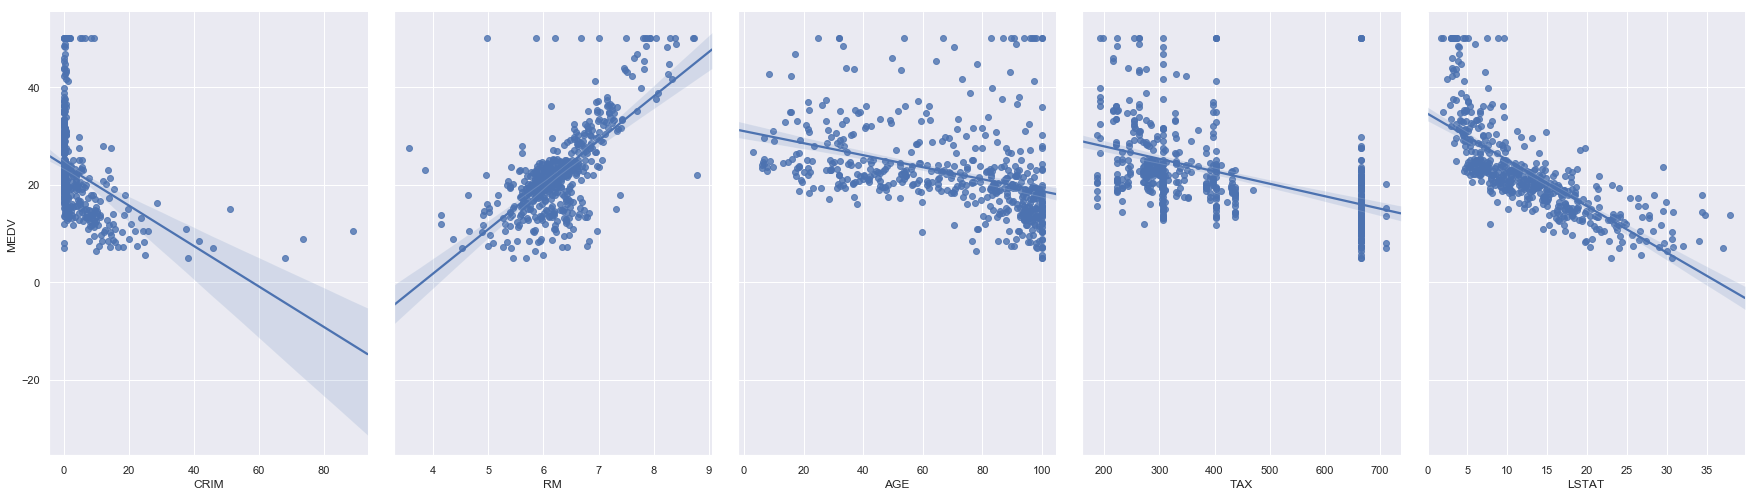

In [8]:
sns.pairplot(dfBoston, x_vars=['CRIM','RM','AGE', 'TAX','LSTAT'], y_vars='MEDV', size=7, aspect=0.7, kind='reg')

# Verificamos que RM é inversamente proporcional ao LSTAT, e como não possuem forte correlação entre si são ótimos candidatos para o modelo

In [9]:
X = pd.DataFrame(np.c_[dfBoston['LSTAT'], dfBoston['RM']], columns = ['LSTAT','RM'])
Y = dfBoston['MEDV']

# Separamos as variáveis que iremos utilizar para treino e teste

In [10]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

# Criamos a variável modelo e preparamos para aplicar regressão

In [11]:
from sklearn.model_selection import train_test_split

# use test_size = 0.2, o random_state eu vou alterar depois para um número secreto
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

### neste espaço, faça o mesmo pré-processamento que fez na criação do seu modelo
### lembre, a variavel "modelo" já deverá ter sido criada na célula anterior

modelo.fit(X_train, y_train)


### fim do espaço do pré-processamento

y_pred = modelo.predict(X_test)
resultado = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(resultado)

20.743640153704927


# Treinado e testado o modelo apresentou uma média de 20% de erro, é considerável então tentaremos fazer por validação cruzada

In [12]:
from sklearn.model_selection import KFold

X = X.values
y = Y.values

kf = KFold(n_splits = 10, random_state = 42)

scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    score = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    scores.append(score)
    
scores = np.array(scores)

print("MAPE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

MAPE: 23.17 (+/- 32.19)
[14.63213288 11.37742697 17.30587063 14.62447954 14.3499061  13.03277913
 18.61279676 56.12403412 54.03450492 17.58137941]


In [14]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()


# Houve vezes que teve apenas 11% de erro, o que é ótimo, mas em compensação teve outras na casa dos 56%, o que é péssimo, o modelo pode ser melhorado, talvez usando mais dados para treino.

In [27]:
from sklearn.model_selection import train_test_split

X_t, y_t = load_boston(return_X_y = True)

# use test_size = 0.2, o random_state eu vou alterar depois para um número secreto
_, X_test, _, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42) 

### neste espaço, faça o mesmo pré-processamento que fez na criação do seu modelo
X_test = X_test[:,[5,12]]

from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
BostonData = load_boston()
dfBoston = pd.DataFrame(BostonData.data,columns = BostonData.feature_names)
dfBoston['MEDV'] = BostonData.target
X = pd.DataFrame(np.c_[dfBoston['RM'], dfBoston['LSTAT']], columns = ['RM','LSTAT'])
Y = dfBoston['MEDV']
X_train, _, y_train, _ = train_test_split(X, Y, test_size=0.2, random_state=200) 

### lembre, a variavel "modelo" já deverá ter sido criada na célula anterior

modelo.fit(X_train,y_train)

### fim do espaço do pré-processamento

y_pred = modelo.predict(X_test)
resultado = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(resultado)

20.43460319786383
